In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import roc_curve, auc
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

# Data Loading

In [103]:
df1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/4th-Year-Final-Project/Colon_Positive_PPIN.csv")
df2=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/4th-Year-Final-Project/Colon_Negative_PPIN.csv")

# Data Pre-Processing

In [104]:
df1['Label']=1

In [105]:
df1.head()

,Entry,Subgragh,Degree,Eigenvector,Information,LAC,Betweenness,Closeness,Network,Label
0,P04626,7420.5205,85,0.648208,2.108967,0.0,59318.504,0.004708,0.0,1
1,P40692,2282.4443,71,0.000000,2.098999,0.0,5950.000,0.002079,0.0,1
2,Q12797,1821.8620,67,0.007771,2.095400,0.0,41993.470,0.004695,0.0,1
3,P31749,1109.6257,59,0.071635,2.086870,0.0,52718.805,0.004708,0.0,1
4,P21860,1107.7312,32,0.243983,2.029321,0.0,14959.865,0.004704,0.0,1


In [106]:
df2['Label']=0

In [107]:
df2

,Entry,Subgragh,Degree,Eigenvector,Information,LAC,Betweenness,Closeness,Network,Label
0,P46937,258.114720,39,0.706762,2.035775,0,2014.0,0.006491,0,0
1,Q9Y5Y5,74.401160,25,0.000000,1.982009,0,744.0,0.005813,0,0
2,Q969Z0,66.794720,24,0.000000,1.976036,0,1380.0,0.006322,0,0
3,O95125,35.109510,18,0.000000,1.928384,0,1122.0,0.006320,0,0
4,P10644,30.883467,17,0.000000,1.917679,0,272.0,0.005464,0,0
...,...,...,...,...,...,...,...,...,...,...
195,Q04727,1.543081,1,0.000000,1.040082,0,0.0,0.005025,0,0
196,O00463,1.543081,1,0.000000,1.040082,0,0.0,0.005025,0,0
197,P50453,1.543081,1,0.000000,1.040082,0,0.0,0.005025,0,0
198,Q9H5X1,1.543080,1,0.000000,1.040082,0,0.0,0.005025,0,0


In [108]:
df2.describe()

,Subgragh,Degree,Eigenvector,Information,LAC,Betweenness,Closeness,Network,Label
count,200.000000,200.000000,200.000000,200.000000,200.0,200.000000,200.000000,200.0,200.0
mean,6.267391,1.890000,0.025828,1.098458,0.0,40.580000,0.005854,0.0,0.0
std,19.450613,4.091651,0.065990,0.193298,0.0,211.384428,0.000537,0.0,0.0
min,1.520490,1.000000,0.000000,1.040082,0.0,0.000000,0.005025,0.0,0.0
25%,2.249127,1.000000,0.000000,1.040082,0.0,0.000000,0.005311,0.0,0.0
50%,3.642014,1.000000,0.000000,1.040082,0.0,0.000000,0.005809,0.0,0.0
75%,6.256277,1.000000,0.000000,1.040082,0.0,0.000000,0.006315,0.0,0.0
max,258.114720,39.000000,0.706762,2.035775,0.0,2014.000000,0.006491,0.0,0.0


In [109]:
df2.dtypes

,0
Entry,object
Subgragh,float64
Degree,int64
Eigenvector,float64
Information,float64
LAC,int64
Betweenness,float64
Closeness,float64
Network,int64
Label,int64


In [110]:
merged_df = pd.concat([df1, df2], axis=0)

In [111]:
merged_df

,Entry,Subgragh,Degree,Eigenvector,Information,LAC,Betweenness,Closeness,Network,Label
0,P04626,7420.520500,85,0.648208,2.108967,0.0,59318.504,0.004708,0.0,1
1,P40692,2282.444300,71,0.000000,2.098999,0.0,5950.000,0.002079,0.0,1
2,Q12797,1821.862000,67,0.007771,2.095400,0.0,41993.470,0.004695,0.0,1
3,P31749,1109.625700,59,0.071635,2.086870,0.0,52718.805,0.004708,0.0,1
4,P21860,1107.731200,32,0.243983,2.029321,0.0,14959.865,0.004704,0.0,1
...,...,...,...,...,...,...,...,...,...,...
195,Q04727,1.543081,1,0.000000,1.040082,0.0,0.000,0.005025,0.0,0
196,O00463,1.543081,1,0.000000,1.040082,0.0,0.000,0.005025,0.0,0
197,P50453,1.543081,1,0.000000,1.040082,0.0,0.000,0.005025,0.0,0
198,Q9H5X1,1.543080,1,0.000000,1.040082,0.0,0.000,0.005025,0.0,0


In [112]:
df=merged_df.reset_index(drop=True)

In [113]:
df.shape

(759, 10)

In [114]:
df.drop(['Entry'],axis=1,inplace=True)

In [115]:
df

,Subgragh,Degree,Eigenvector,Information,LAC,Betweenness,Closeness,Network,Label
0,7420.520500,85,0.648208,2.108967,0.0,59318.504,0.004708,0.0,1
1,2282.444300,71,0.000000,2.098999,0.0,5950.000,0.002079,0.0,1
2,1821.862000,67,0.007771,2.095400,0.0,41993.470,0.004695,0.0,1
3,1109.625700,59,0.071635,2.086870,0.0,52718.805,0.004708,0.0,1
4,1107.731200,32,0.243983,2.029321,0.0,14959.865,0.004704,0.0,1
...,...,...,...,...,...,...,...,...,...
754,1.543081,1,0.000000,1.040082,0.0,0.000,0.005025,0.0,0
755,1.543081,1,0.000000,1.040082,0.0,0.000,0.005025,0.0,0
756,1.543081,1,0.000000,1.040082,0.0,0.000,0.005025,0.0,0
757,1.543080,1,0.000000,1.040082,0.0,0.000,0.005025,0.0,0


# Train Test Split

In [116]:
from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(df[['Entry Name','Subgragh','Degree','Eigenvector','Information','LAC','Betweenness','Closeness','Network']],df['Label'],test_size=0.2,random_state=25)
x_train,x_test,y_train,y_test=train_test_split(df[['Subgragh','Degree','Eigenvector','Information','LAC','Betweenness','Closeness','Network']],df['Label'],test_size=0.2,random_state=25)

In [117]:
x_test

,Subgragh,Degree,Eigenvector,Information,LAC,Betweenness,Closeness,Network
444,2.265426,1,0.000502,1.040808,0.0,0.0,0.004676,0.0
51,79.035355,1,0.066271,1.040808,0.0,0.0,0.004695,0.0
140,33.133190,1,0.000000,1.040808,0.0,0.0,0.002078,0.0
242,28.130140,1,0.000803,1.040808,0.0,0.0,0.004681,0.0
624,3.931812,1,0.000000,1.040082,0.0,0.0,0.005809,0.0
...,...,...,...,...,...,...,...,...
118,33.133995,1,0.000000,1.040808,0.0,0.0,0.002078,0.0
450,2.178184,2,0.000000,1.258299,0.0,2.0,0.001795,0.0
187,28.130142,1,0.000803,1.040808,0.0,0.0,0.004681,0.0
708,2.249127,1,0.000000,1.040082,0.0,0.0,0.005318,0.0


In [118]:
len(y_train)

607

In [119]:
x_train.shape

(607, 8)

In [120]:
x_train.dtypes

,0
Subgragh,float64
Degree,int64
Eigenvector,float64
Information,float64
LAC,float64
Betweenness,float64
Closeness,float64
Network,float64


In [121]:
x_train

,Subgragh,Degree,Eigenvector,Information,LAC,Betweenness,Closeness,Network
9,187.832610,3,0.100432,1.405113,0.0,6137.5645,0.004702,0.0
134,33.133995,1,0.000000,1.040808,0.0,0.0000,0.002078,0.0
372,7.951393,1,0.000000,1.040808,0.0,0.0000,0.001927,0.0
612,3.931812,1,0.000000,1.040082,0.0,0.0000,0.005809,0.0
81,79.035350,1,0.066271,1.040808,0.0,0.0000,0.004695,0.0
...,...,...,...,...,...,...,...,...
317,13.634484,1,0.009018,1.040808,0.0,0.0000,0.004683,0.0
143,33.133190,1,0.000000,1.040808,0.0,0.0000,0.002078,0.0
474,1.868009,1,0.000000,1.040808,0.0,0.0000,0.002077,0.0
318,13.634484,1,0.009018,1.040808,0.0,0.0000,0.004683,0.0


In [122]:
def Conf(pred):
  from sklearn.metrics import confusion_matrix
  import matplotlib.pyplot as plt
  cm=confusion_matrix(y_test,pred)
  ax=plt.subplot()
  sns.heatmap(cm,annot=True,ax=ax)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  plt.show()

In [123]:
y_train.index

Index([  9, 134, 372, 612,  81, 111, 470, 518, 489, 412,
       ...
       253, 156, 136, 151, 255, 317, 143, 474, 318, 132],
      dtype='int64', length=607)

In [124]:
y_test.index=[*range(len(y_test))]
y_test.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151],
      dtype='int64', length=152)

# Support Vector Machine

In [125]:
from sklearn.svm import SVC

model_svc = SVC()
model_svc.fit(x_train, y_train)

SVC()

In [126]:
prediction1 = model_svc.predict(x_test)
#calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction1))
for i in range(len(prediction1)):
    print(y_test[i],prediction1[i])

0.7894736842105263
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
0 1
1 1
0 1
0 1
1 1
1 1
0 1
0 1
0 1
1 1
0 1
1 1
1 1
0 1
0 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
0 1
1 1
0 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
0 1
0 1
1 1
0 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
0 1
1 1
0 1
1 1
1 1
1 1
1 1
0 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1


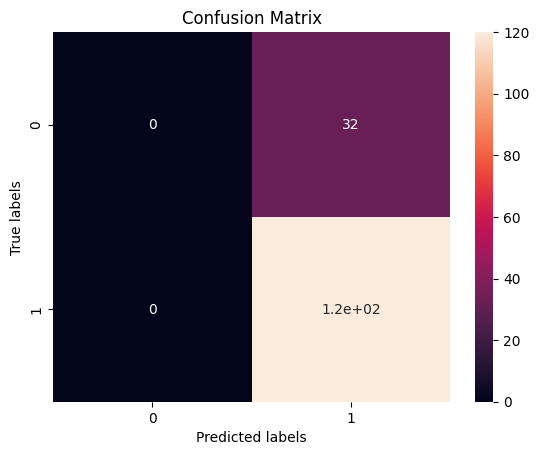

In [127]:
Conf(prediction1)

# Logistic Regression

In [128]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression(max_iter=1000)
model_LR.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [129]:
prediction2 = model_LR.predict(x_test)
#Calculate the accuracy
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test, prediction2))
for i in range(len(prediction1)):
  print(y_test[i], prediction1[i])

0.7631578947368421
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
0 1
1 1
0 1
0 1
1 1
1 1
0 1
0 1
0 1
1 1
0 1
1 1
1 1
0 1
0 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
0 1
1 1
0 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
0 1
0 1
1 1
0 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
0 1
1 1
0 1
1 1
1 1
1 1
1 1
0 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1


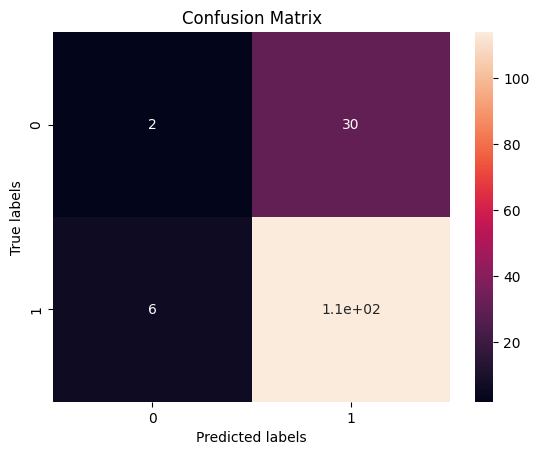

In [130]:
Conf(prediction2)

# Decision Tree Classifier

In [131]:
from sklearn.tree import DecisionTreeClassifier
model_DTC = DecisionTreeClassifier()
model_DTC.fit(x_train, y_train)

DecisionTreeClassifier()

In [132]:
prediction3 = model_DTC.predict(x_test)
#Calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction3))

1.0


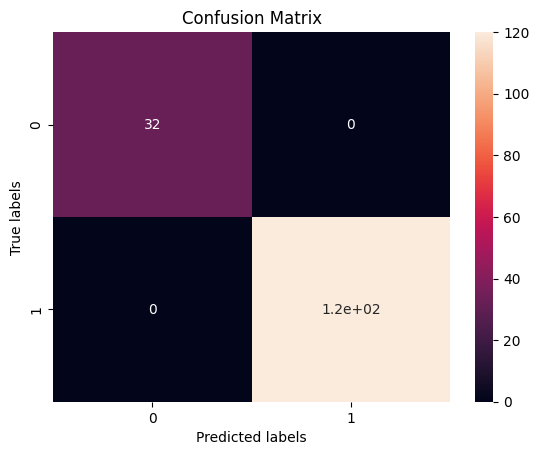

In [133]:
Conf(prediction3)

# Random Forest Classifier

In [134]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier()
model_RF.fit(x_train, y_train)

RandomForestClassifier()

In [135]:
prediction4 = model_RF.predict(x_test)
#Calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction4))

1.0


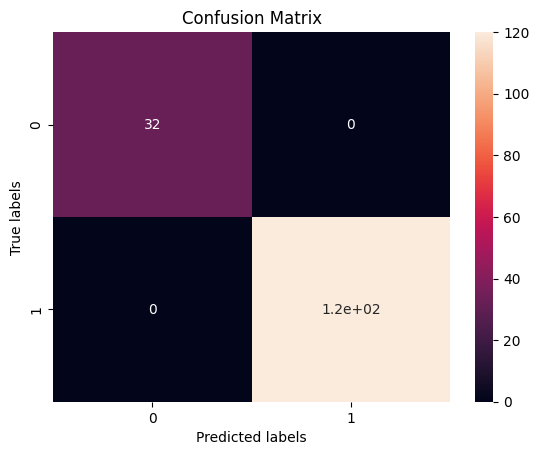

In [136]:
Conf(prediction4)

# Naive Bayes

In [137]:
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB()
model_NB.fit(x_train, y_train)

GaussianNB()

In [138]:
prediction5 = model_NB.predict(x_test)
#Calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction5))

0.27631578947368424


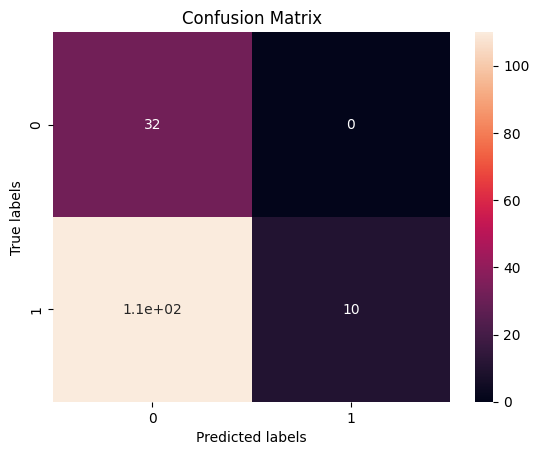

In [139]:
Conf(prediction5)

# K-Nearest Neighbour

In [140]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier()
model_KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [141]:
prediction6 = model_KNN.predict(x_test)
#Calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction6))

0.9407894736842105


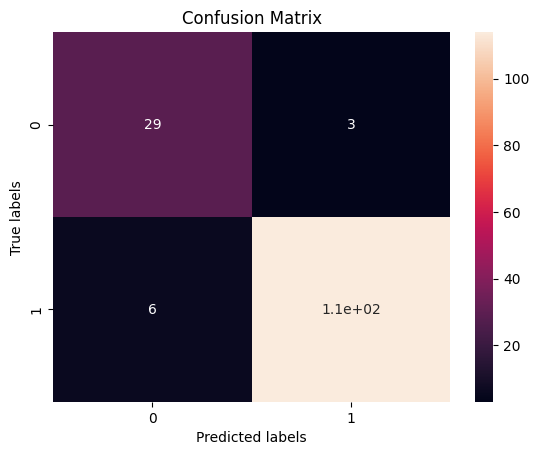

In [142]:
Conf(prediction6)

# XGBoost

In [143]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
dtrain=xgb.DMatrix(x_train, label=y_train)
params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'learning_rate': 0.1,
    'max_depth': 10,
    'alpha': 10
}
model_XGB = xgb.train(params=params, dtrain=dtrain, num_boost_round=100)
dtest=xgb.DMatrix(x_test)

In [144]:
prediction7 = model_XGB.predict(dtest)
#Calculate the accuracy
y_test = le.fit_transform(y_test)
accuracy=sum(prediction7==y_test)/len(y_test)
print(accuracy)

1.0


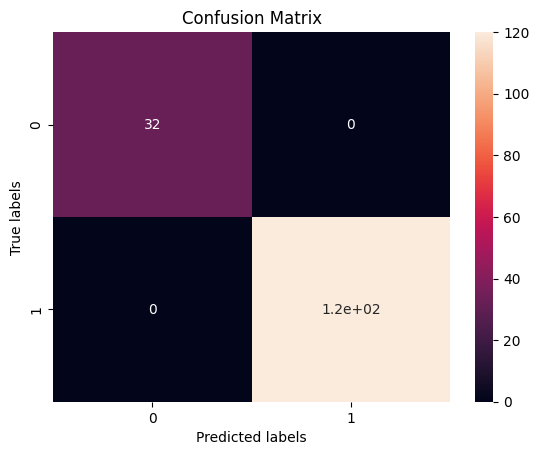

In [145]:
Conf(prediction7)

# AdaBoost

In [146]:
from sklearn.ensemble import AdaBoostClassifier
model_ADB = AdaBoostClassifier(n_estimators=100)
model_ADB.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [147]:
prediction8 = model_ADB.predict(x_test)
#Calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction8))

1.0


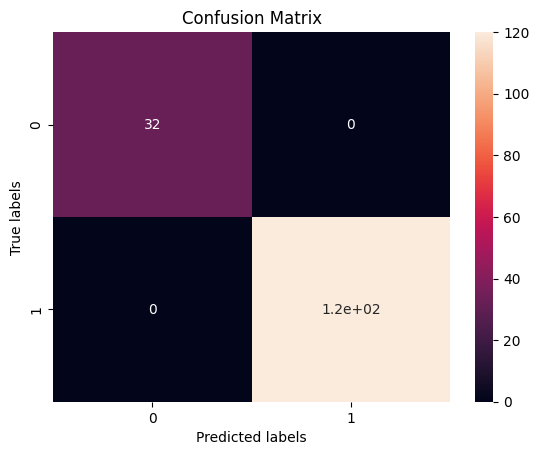

In [148]:
Conf(prediction8)

# Sequential Deep Learning

In [149]:
model = keras.Sequential([
    #keras.layers.Dense(10, input_shape=(607,9), activation='sigmoid')
    keras.layers.Dense(26, input_dim=8, activation='softmax'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=500)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.3984 - loss: 0.6954
Epoch 2/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7096 - loss: 0.6786
Epoch 3/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7279 - loss: 0.6646
Epoch 4/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7616 - loss: 0.6461
Epoch 5/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7141 - loss: 0.6393
Epoch 6/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7192 - loss: 0.6251
Epoch 7/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7382 - loss: 0.6085
Epoch 8/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7478 - loss: 0.5910
Epoch 9/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7181 - loss: 0.5928
Epoch 10/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7316 - loss: 0.5770
Epoch 11/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7060 - loss: 0.5807
Epoch 12/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - a

In [150]:
predictions = model.predict(x_test)
conf_matrix = tf.math.confusion_matrix(labels=y_test, predictions=predictions)

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


# ROC Curve

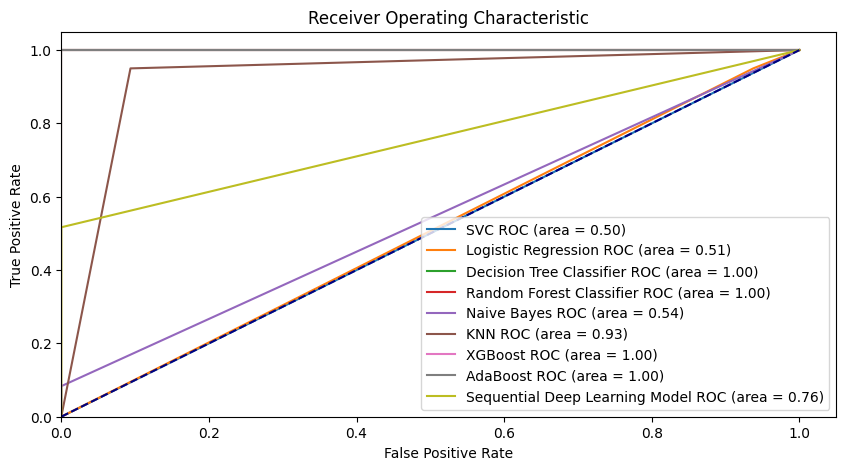

In [151]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define a list to store ROC data
roc_data = []

# Define a function to calculate ROC data
def calc_roc(y_test, pred, model_name):
    fpr, tpr, _ = roc_curve(y_test.astype(int), pred.astype(int))
    roc_auc = auc(fpr, tpr)
    roc_data.append((fpr, tpr, roc_auc, model_name))

# Calculate ROC data for each model
calc_roc(y_test, prediction1, 'SVC')
calc_roc(y_test, prediction2, 'Logistic Regression')
calc_roc(y_test, prediction3, 'Decision Tree Classifier')
calc_roc(y_test, prediction4, 'Random Forest Classifier')
calc_roc(y_test, prediction5, 'Naive Bayes')
calc_roc(y_test, prediction6, 'KNN')
calc_roc(y_test, prediction7, 'XGBoost')
calc_roc(y_test, prediction8, 'AdaBoost')
calc_roc(y_test, predictions, 'Sequential Deep Learning Model')
# and so on for each model...

# Plot all ROC curves on the same graph
plt.figure(figsize=(10,5))

for fpr, tpr, roc_auc, model_name in roc_data:
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (model_name, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()